### Task 1: Data Profiling to Understand Data Quality
**Description**: Use basic statistical methods to profile a dataset and identify potential quality issues.

**Steps**:
1. Load the dataset using pandas in Python.
2. Understand the data by checking its basic statistics.
3. Identify null values.
4. Check unique values for categorical columns.
5. Review outliers using box plots.

--- Initial Dataset Sample ---
   TransactionID  Customer_ID  Purchase_Amount Product_Category  \
0              1       4174.0            88.41             Food   
1              2       4507.0           159.48            Books   
2              3       1860.0           219.98             Food   
3              4       2294.0           127.63            Books   
4              5       2130.0           167.03             Food   

  Transaction_Date Payment_Method  Quantity  Rating  
0       2024-01-13    Credit Card         4       5  
1       2024-07-02    Credit Card         6       4  
2       2024-04-20     Debit Card         4       1  
3       2024-10-16    Credit Card         9       5  
4       2024-10-21         PayPal         5       1  

Initial DataFrame Shape: (1000, 8)

--- DataFrame Info (Data Types and Non-Null Counts) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype

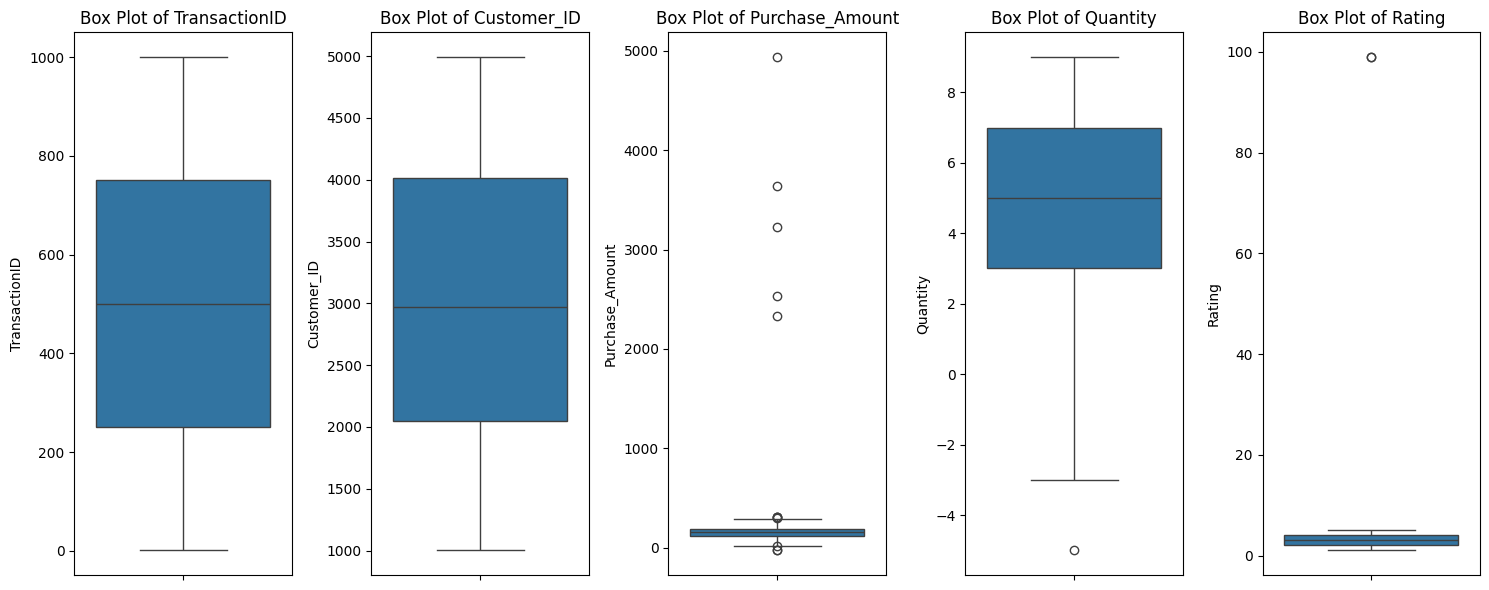


Interpretation of Box Plots:
 - The box represents the Interquartile Range (IQR), from 25th to 75th percentile.
 - The line inside the box is the median (50th percentile).
 - The 'whiskers' extend to the most extreme data points within 1.5 times the IQR from the box.
 - Points plotted individually beyond the whiskers are considered potential outliers.

Based on the plots, observe if there are points far from the main distribution, indicating outliers.
For example, 'Purchase_Amount' might show high outliers, 'Quantity' might show negative or very high values, and 'Rating' might show values like 99.

--- Data Quality Profiling Complete ---
Review the output to identify: missing data, incorrect data types, inconsistent entries in categorical fields, and extreme values/outliers in numerical fields.


In [17]:
# write your code from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# --- 1. Load the dataset (Generating a Synthetic Dataset) ---
# Create a synthetic dataset to demonstrate data quality issues
num_records = 1000

data = {
    'TransactionID': range(1, num_records + 1),
    'Customer_ID': np.random.randint(1000, 5000, num_records),
    'Purchase_Amount': np.random.normal(150, 50, num_records).round(2),
    'Product_Category': np.random.choice(['Electronics', 'Books', 'Clothing', 'Home Goods', 'Food'], num_records),
    'Transaction_Date': pd.to_datetime('2024-01-01') + pd.to_timedelta(np.random.randint(0, 365, num_records), unit='D'),
    'Payment_Method': np.random.choice(['Credit Card', 'Debit Card', 'PayPal', 'Bank Transfer'], num_records),
    'Quantity': np.random.randint(1, 10, num_records),
    'Rating': np.random.randint(1, 6, num_records), # For potential outliers
}

df = pd.DataFrame(data)

# Introduce some data quality issues:
# 1. Null values
df.loc[np.random.choice(df.index, 50, replace=False), 'Customer_ID'] = np.nan
df.loc[np.random.choice(df.index, 30, replace=False), 'Purchase_Amount'] = np.nan
df.loc[np.random.choice(df.index, 20, replace=False), 'Product_Category'] = np.nan
df.loc[np.random.choice(df.index, 10, replace=False), 'Transaction_Date'] = pd.NaT # For NaT in datetime

# 2. Inconsistent categorical values
df.loc[df.sample(frac=0.05).index, 'Product_Category'] = 'electronics' # lowercase
df.loc[df.sample(frac=0.03).index, 'Product_Category'] = 'Books '      # trailing space
df.loc[df.sample(frac=0.02).index, 'Product_Category'] = 'ELEC'        # abbreviation
df.loc[df.sample(frac=0.01).index, 'Payment_Method'] = 'credit card' # lowercase
df.loc[df.sample(frac=0.01).index, 'Payment_Method'] = 'PayPal '     # trailing space

# 3. Outliers in numerical columns
# High outliers for Purchase_Amount
df.loc[np.random.choice(df.index, 5, replace=False), 'Purchase_Amount'] = np.random.uniform(1000, 5000, 5).round(2)
# Low outliers (e.g., negative quantity due to error)
df.loc[np.random.choice(df.index, 3, replace=False), 'Quantity'] = np.random.randint(-5, 0, 3)
# Outlier for Rating (e.g., an invalid rating)
df.loc[np.random.choice(df.index, 2, replace=False), 'Rating'] = 99

print("--- Initial Dataset Sample ---")
print(df.head())
print(f"\nInitial DataFrame Shape: {df.shape}")

# --- 2. Understand the data by checking its basic statistics ---
print("\n--- DataFrame Info (Data Types and Non-Null Counts) ---")
df.info()

print("\n--- Basic Statistics for Numerical Columns (df.describe()) ---")
print(df.describe())

print("\n--- Basic Statistics for Categorical/Object Columns (df.describe(include='object')) ---")
# Get object columns (often indicates categorical or string data)
object_cols = df.select_dtypes(include='object').columns
if not object_cols.empty:
    print(df[object_cols].describe())
else:
    print("No object type columns found to describe.")

# --- 3. Identify null values ---
print("\n--- Missing Values Count ---")
print(df.isnull().sum())

print("\n--- Missing Values Percentage (%) ---")
print(df.isnull().sum() / len(df) * 100)

# --- 4. Check unique values for categorical columns ---
print("\n--- Unique Values and Frequencies for Categorical/Object Columns ---")
# Re-identifying categorical-like columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

if not categorical_cols.empty:
    for col in categorical_cols:
        print(f"\nColumn: '{col}'")
        print(f"Unique values ({df[col].nunique()}): {df[col].unique()}")
        print(f"Value Counts:\n{df[col].value_counts(dropna=False)}") # include NaN in counts
else:
    print("No categorical or object type columns found to analyze unique values.")

# --- 5. Review outliers using box plots ---
print("\n--- Visualizing Outliers with Box Plots ---")
numerical_cols = df.select_dtypes(include=np.number).columns

if not numerical_cols.empty:
    plt.figure(figsize=(15, 6))
    for i, col in enumerate(numerical_cols):
        plt.subplot(1, len(numerical_cols), i + 1)
        sns.boxplot(y=df[col].dropna()) # Drop NaNs for plotting
        plt.title(f'Box Plot of {col}')
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()

    print("\nInterpretation of Box Plots:")
    print(" - The box represents the Interquartile Range (IQR), from 25th to 75th percentile.")
    print(" - The line inside the box is the median (50th percentile).")
    print(" - The 'whiskers' extend to the most extreme data points within 1.5 times the IQR from the box.")
    print(" - Points plotted individually beyond the whiskers are considered potential outliers.")
    print("\nBased on the plots, observe if there are points far from the main distribution, indicating outliers.")
    print("For example, 'Purchase_Amount' might show high outliers, 'Quantity' might show negative or very high values, and 'Rating' might show values like 99.")
else:
    print("No numerical columns found to plot for outliers.")

print("\n--- Data Quality Profiling Complete ---")
print("Review the output to identify: missing data, incorrect data types, inconsistent entries in categorical fields, and extreme values/outliers in numerical fields.")


### Task 2: Implement Simple Data Validation
**Description**: Write a Python script to validate the data types and constraints of each column in a dataset.

**Steps**:
1. Define constraints for each column.
2. Validate each column based on its constraints.

In [18]:
# write your code from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# --- 1. Load the dataset (Re-generating Synthetic Dataset for Validation Demo) ---
# Create a synthetic dataset to demonstrate data quality issues for validation
num_records = 1000

data = {
    'TransactionID': range(1, num_records + 1),
    'Customer_ID': np.random.randint(1000, 5000, num_records),
    'Purchase_Amount': np.random.normal(150, 50, num_records).round(2),
    'Product_Category': np.random.choice(['Electronics', 'Books', 'Clothing', 'Home Goods', 'Food'], num_records),
    'Transaction_Date': pd.to_datetime('2024-01-01') + pd.to_timedelta(np.random.randint(0, 365, num_records), unit='D'),
    'Payment_Method': np.random.choice(['Credit Card', 'Debit Card', 'PayPal', 'Bank Transfer'], num_records),
    'Quantity': np.random.randint(1, 10, num_records),
    'Rating': np.random.randint(1, 6, num_records),
}

df = pd.DataFrame(data)

# Introduce various data quality issues deliberately for validation
# 1. Null values
df.loc[np.random.choice(df.index, 50, replace=False), 'Customer_ID'] = np.nan
df.loc[np.random.choice(df.index, 30, replace=False), 'Purchase_Amount'] = np.nan
df.loc[np.random.choice(df.index, 20, replace=False), 'Product_Category'] = np.nan
df.loc[np.random.choice(df.index, 10, replace=False), 'Transaction_Date'] = pd.NaT

# 2. Inconsistent categorical values (will fail 'allowed values' check)
df.loc[df.sample(frac=0.05).index, 'Product_Category'] = 'electronics' # lowercase
df.loc[df.sample(frac=0.03).index, 'Product_Category'] = 'Books '      # trailing space
df.loc[df.sample(frac=0.02).index, 'Product_Category'] = 'ELEC'        # abbreviation
df.loc[df.sample(frac=0.01).index, 'Payment_Method'] = 'credit card' # lowercase
df.loc[df.sample(frac=0.01).index, 'Payment_Method'] = 'PayPal '     # trailing space

# 3. Outliers/Invalid values in numerical columns (will fail 'range' check)
# High outliers for Purchase_Amount
df.loc[np.random.choice(df.index, 5, replace=False), 'Purchase_Amount'] = np.random.uniform(1001, 5000, 5).round(2)
# Low outliers (e.g., negative quantity due to error)
df.loc[np.random.choice(df.index, 3, replace=False), 'Quantity'] = np.random.randint(-5, 0, 3)
# Outlier for Rating (e.g., an invalid rating)
df.loc[np.random.choice(df.index, 2, replace=False), 'Rating'] = 99
# Zero quantity (invalid per constraint)
df.loc[np.random.choice(df.index, 4, replace=False), 'Quantity'] = 0

# 4. Duplicate TransactionID (for testing uniqueness)
df.loc[df.sample(frac=0.01).index, 'TransactionID'] = df.iloc[0]['TransactionID'] # Duplicate existing ID

print("--- Initial Dataset Sample (with introduced issues) ---")
print(df.head(10))
print(f"\nInitial DataFrame Shape: {df.shape}")
print("-" * 50)

# --- 1. Define constraints for each column ---
constraints = {
    'TransactionID': {
        'type': np.int64,
        'nullable': False,
        'unique': True,
        'min_value': 1
    },
    'Customer_ID': {
        'type': np.number, # Use np.number for int/float
        'nullable': True, # We allow some nulls, but check for valid range when not null
        'min_value': 1000,
        'max_value': 5000
    },
    'Purchase_Amount': {
        'type': np.number,
        'nullable': True,
        'min_value': 0.01,
        'max_value': 1000.00
    },
    'Product_Category': {
        'type': object, # Use object for string/categorical
        'nullable': True,
        'allowed_values': ['Electronics', 'Books', 'Clothing', 'Home Goods', 'Food']
    },
    'Transaction_Date': {
        'type': 'datetime64[ns]',
        'nullable': True,
        'min_date': pd.to_datetime('2024-01-01'),
        'max_date': pd.to_datetime('2024-12-31')
    },
    'Payment_Method': {
        'type': object,
        'nullable': False,
        'allowed_values': ['Credit Card', 'Debit Card', 'PayPal', 'Bank Transfer']
    },
    'Quantity': {
        'type': np.int64,
        'nullable': False,
        'min_value': 1,
        'max_value': 10
    },
    'Rating': {
        'type': np.int64,
        'nullable': False,
        'min_value': 1,
        'max_value': 5
    }
}

# --- 2. Validate each column based on its constraints ---
print("\n--- Data Validation Report ---")
validation_results = {}

for col, config in constraints.items():
    print(f"\nValidating Column: '{col}'")
    col_failures = []

    # 1. Check if column exists
    if col not in df.columns:
        col_failures.append(f"Column '{col}' does not exist in the DataFrame.")
        validation_results[col] = col_failures
        print(f"  FAILURE: Column '{col}' not found.")
        continue # Skip further checks if column doesn't exist

    series = df[col]

    # 2. Check Data Type
    # For numerical types, check if it's broadly a number (float or int)
    if config['type'] == np.number:
        if not pd.api.types.is_numeric_dtype(series):
            col_failures.append(f"Incorrect data type: Expected numeric, got {series.dtype}.")
            print(f"  FAILURE: Type - Expected numeric, got {series.dtype}.")
    # For datetime, check if it's datetime
    elif config['type'] == 'datetime64[ns]':
        if not pd.api.types.is_datetime64_any_dtype(series):
            col_failures.append(f"Incorrect data type: Expected datetime, got {series.dtype}.")
            print(f"  FAILURE: Type - Expected datetime, got {series.dtype}.")
    # For other types, check exact dtype
    elif series.dtype != config['type']:
        col_failures.append(f"Incorrect data type: Expected {config['type']}, got {series.dtype}.")
        print(f"  FAILURE: Type - Expected {config['type']}, got {series.dtype}.")

    # 3. Check Nullability
    if not config['nullable'] and series.isnull().any():
        num_nulls = series.isnull().sum()
        col_failures.append(f"Contains {num_nulls} null values, but not allowed to be nullable.")
        print(f"  FAILURE: Nulls - Expected non-nullable, found {num_nulls} nulls.")

    # 4. Check Uniqueness (for TransactionID)
    if 'unique' in config and config['unique']:
        if series.duplicated().any():
            num_duplicates = series.duplicated().sum()
            col_failures.append(f"Contains {num_duplicates} duplicate values, but expected to be unique.")
            print(f"  FAILURE: Uniqueness - Expected unique, found {num_duplicates} duplicate(s).")

    # 5. Check Value Ranges (for numerical columns)
    if 'min_value' in config or 'max_value' in config:
        # Filter out nulls for range checks, as nulls are handled by 'nullable' check
        non_null_series = series.dropna()
        if not non_null_series.empty:
            if 'min_value' in config and (non_null_series < config['min_value']).any():
                invalid_min_count = (non_null_series < config['min_value']).sum()
                col_failures.append(f"Contains {invalid_min_count} values below min_value ({config['min_value']}).")
                print(f"  FAILURE: Range - {invalid_min_count} value(s) below min ({config['min_value']}).")
            if 'max_value' in config and (non_null_series > config['max_value']).any():
                invalid_max_count = (non_null_series > config['max_value']).sum()
                col_failures.append(f"Contains {invalid_max_count} values above max_value ({config['max_value']}).")
                print(f"  FAILURE: Range - {invalid_max_count} value(s) above max ({config['max_value']}).")

    # 6. Check Allowed Values (for categorical columns)
    if 'allowed_values' in config:
        # Convert to string and drop NaNs for comparison
        invalid_values = series[~series.isin(config['allowed_values']) & series.notna()]
        if not invalid_values.empty:
            num_invalid_values = len(invalid_values)
            col_failures.append(f"Contains {num_invalid_values} values not in allowed_values: {invalid_values.unique().tolist()}.")
            print(f"  FAILURE: Allowed Values - {num_invalid_values} invalid value(s) found (e.g., {invalid_values.unique()[:3].tolist()}).")

    # 7. Check Date Range (for datetime columns)
    if 'min_date' in config or 'max_date' in config:
        non_null_series = series.dropna()
        if not non_null_series.empty:
            if 'min_date' in config and (non_null_series < config['min_date']).any():
                invalid_min_date_count = (non_null_series < config['min_date']).sum()
                col_failures.append(f"Contains {invalid_min_date_count} dates before min_date ({config['min_date'].date()}).")
                print(f"  FAILURE: Date Range - {invalid_min_date_count} date(s) before min ({config['min_date'].date()}).")
            if 'max_date' in config and (non_null_series > config['max_date']).any():
                invalid_max_date_count = (non_null_series > config['max_date']).sum()
                col_failures.append(f"Contains {invalid_max_date_count} dates after max_date ({config['max_date'].date()}).")
                print(f"  FAILURE: Date Range - {invalid_max_date_count} date(s) after max ({config['max_date'].date()}).")

    if not col_failures:
        print(f"  SUCCESS: All checks passed for '{col}'.")
    validation_results[col] = col_failures

print("\n--- Summary of Validation Results ---")
total_failures = 0
for col, failures in validation_results.items():
    if failures:
        print(f"Column '{col}': {len(failures)} FAILURE(S)")
        for failure in failures:
            print(f"  - {failure}")
        total_failures += len(failures)
    else:
        print(f"Column '{col}': PASSED")

if total_failures == 0:
    print("\nOverall: All columns passed all defined validation checks.")
else:
    print(f"\nOverall: Found {total_failures} validation failure(s) across the dataset.")

--- Initial Dataset Sample (with introduced issues) ---
   TransactionID  Customer_ID  Purchase_Amount Product_Category  \
0              1       4174.0            88.41             Food   
1              2       4507.0           159.48            Books   
2              3       1860.0           219.98             Food   
3              4       2294.0           127.63            Books   
4              5       2130.0           167.03             Food   
5              6       2095.0           149.31      Electronics   
6              7       4772.0           218.62      Electronics   
7              8          NaN           116.11      Electronics   
8              9       2638.0           207.68      Electronics   
9             10       3169.0           131.25      Electronics   

  Transaction_Date Payment_Method  Quantity  Rating  
0       2024-01-13    Credit Card         4       5  
1       2024-07-02    Credit Card         6       4  
2       2024-04-20     Debit Card         4 

### Task 3: Detect Missing Data Patterns
**Description**: Analyze and visualize missing data patterns in a dataset.

**Steps**:
1. Visualize missing data using a heatmap.
2. Identify patterns in missing data.

--- Initial Dataset Sample (with introduced missing data) ---
   TransactionID  Customer_ID  Purchase_Amount Product_Category  \
0              1       4174.0            88.41             Food   
1              2       4507.0           159.48            Books   
2              3       1860.0           219.98             Food   
3              4       2294.0           127.63            Books   
4              5       2130.0           167.03             Food   
5              6       2095.0           149.31      Electronics   
6              7       4772.0           218.62      Electronics   
7              8          NaN           116.11      Electronics   
8              9       2638.0           207.68      Electronics   
9             10       3169.0           131.25      Electronics   

  Transaction_Date Payment_Method  Quantity  Rating  
0       2024-01-13    Credit Card         4     5.0  
1       2024-07-02    Credit Card         6     4.0  
2       2024-04-20     Debit Card     

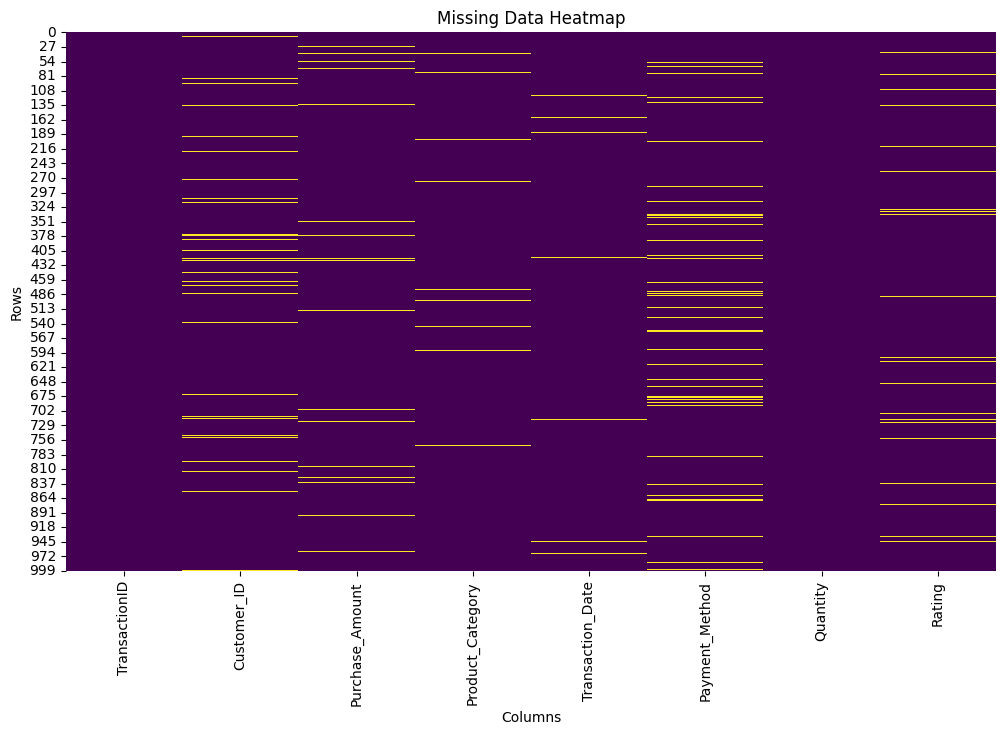


--- Identifying Patterns in Missing Data from the Heatmap ---

Interpretation of the Heatmap:
 - Each row represents a record in the dataset.
 - Each column represents a feature/variable.
 - A bar (or distinct color, depending on cmap) indicates a missing value (NaN/NaT).
 - The absence of a bar indicates a non-missing value.

Potential Patterns to Look For:
1.  **Randomness (Scattered Gaps):** If missing values appear as scattered, isolated bars across many rows and columns, this might suggest data is Missing Completely At Random (MCAR) or Missing At Random (MAR). In our synthetic data, 'Customer_ID', 'Purchase_Amount', and 'Product_Category' show some random missingness.
2.  **Vertical Lines (Column-wise Missingness):** A dense vertical line means that a significant portion or all values in a specific column are missing. This points to systematic issues with data collection for that feature. Our 'Transaction_Date' has a few random missing values, so it's not a dense line, but still 

In [19]:
# write your code from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# --- 1. Load the dataset (Re-generating Synthetic Dataset with Missing Data) ---
# Create a synthetic dataset to demonstrate data quality issues
num_records = 1000

data = {
    'TransactionID': range(1, num_records + 1),
    'Customer_ID': np.random.randint(1000, 5000, num_records),
    'Purchase_Amount': np.random.normal(150, 50, num_records).round(2),
    'Product_Category': np.random.choice(['Electronics', 'Books', 'Clothing', 'Home Goods', 'Food'], num_records),
    'Transaction_Date': pd.to_datetime('2024-01-01') + pd.to_timedelta(np.random.randint(0, 365, num_records), unit='D'),
    'Payment_Method': np.random.choice(['Credit Card', 'Debit Card', 'PayPal', 'Bank Transfer'], num_records),
    'Quantity': np.random.randint(1, 10, num_records),
    'Rating': np.random.randint(1, 6, num_records),
}

df = pd.DataFrame(data)

# Introduce some data quality issues (missing values) for this task:
# 1. Random Null values (MCAR/MAR type)
df.loc[np.random.choice(df.index, 50, replace=False), 'Customer_ID'] = np.nan       # ~5% missing
df.loc[np.random.choice(df.index, 30, replace=False), 'Purchase_Amount'] = np.nan # ~3% missing
df.loc[np.random.choice(df.index, 20, replace=False), 'Product_Category'] = np.nan # ~2% missing
df.loc[np.random.choice(df.index, 10, replace=False), 'Transaction_Date'] = pd.NaT  # ~1% missing

# 2. Introduce a pattern: Payment_Method is often missing if Quantity is very high (just an example pattern)
high_quantity_indices = df[df['Quantity'] >= 8].sample(frac=0.3, random_state=42).index
df.loc[high_quantity_indices, 'Payment_Method'] = np.nan # Missingness correlated with Quantity

# 3. Introduce another pattern: Rating might be missing for 'Food' category products
food_product_indices = df[df['Product_Category'] == 'Food'].sample(frac=0.2, random_state=42).index
df.loc[food_product_indices, 'Rating'] = np.nan

print("--- Initial Dataset Sample (with introduced missing data) ---")
print(df.head(10))
print(f"\nInitial DataFrame Shape: {df.shape}")
print("-" * 50)

# --- 1. Visualize missing data using a heatmap ---

plt.figure(figsize=(12, 7))
# Create a boolean DataFrame (True for missing, False for non-missing)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') # 'viridis' shows missing data in bright colors
plt.title('Missing Data Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

# --- 2. Identify patterns in missing data ---

print("\n--- Identifying Patterns in Missing Data from the Heatmap ---")
print("\nInterpretation of the Heatmap:")
print(" - Each row represents a record in the dataset.")
print(" - Each column represents a feature/variable.")
print(" - A bar (or distinct color, depending on cmap) indicates a missing value (NaN/NaT).")
print(" - The absence of a bar indicates a non-missing value.")

print("\nPotential Patterns to Look For:")
print("1.  **Randomness (Scattered Gaps):** If missing values appear as scattered, isolated bars across many rows and columns, this might suggest data is Missing Completely At Random (MCAR) or Missing At Random (MAR). In our synthetic data, 'Customer_ID', 'Purchase_Amount', and 'Product_Category' show some random missingness.")
print("2.  **Vertical Lines (Column-wise Missingness):** A dense vertical line means that a significant portion or all values in a specific column are missing. This points to systematic issues with data collection for that feature. Our 'Transaction_Date' has a few random missing values, so it's not a dense line, but still noticeable.")
print("3.  **Horizontal Lines (Row-wise Missingness):** A dense horizontal line means an entire record (row) has many or all values missing. This could indicate incomplete record entries. Our synthetic data doesn't have full missing rows, but if it did, they would appear as solid horizontal lines.")
print("4.  **Blocks/Rectangles (Correlated Missingness):** If missing values appear in blocks or rectangles, it suggests that missingness in one column is related to missingness in another. This often happens if certain data points are only collected under specific conditions.")
print("    * In our synthetic data, you might observe a slight vertical cluster of missing values in 'Payment_Method' corresponding to rows where 'Quantity' was high.")
print("    * Similarly, you might see more missing values in 'Rating' for rows where 'Product_Category' was 'Food'. This is a specific example of **Missing At Random (MAR)**, where missingness in one variable is predictable from other *observed* variables.")
print("5.  **Diagonal Patterns:** Less common, but could indicate missingness tied to sequential or temporal aspects (e.g., specific date ranges).")

print("\nBy visually inspecting the heatmap, you can quickly identify which columns have missing data, the density of missingness, and potentially infer relationships between missingness in different columns.")

print("\n--- Missing Data Pattern Detection Complete ---")

### Task 4: Integrate Automated Data Quality Checks
**Description**: Integrate automated data quality checks using the Great Expectations library for a dataset.

**Steps**:
1. Install and initialize Great Expectations.
2. Set up Great Expectations.
3. Add further checks and validate.

In [ ]:
import pandas as pd
import numpy as np
from great_expectations.data_context import EphemeralDataContext

# Set random seed for reproducibility
np.random.seed(42)

# --- 1. Load the dataset (Re-generating Synthetic Dataset with Quality Issues) ---
num_records = 1000

data = {
    'TransactionID': range(1, num_records + 1),
    'Customer_ID': np.random.randint(1000, 5000, num_records),
    'Purchase_Amount': np.random.normal(150, 50, num_records).round(2),
    'Product_Category': np.random.choice(['Electronics', 'Books', 'Clothing', 'Home Goods', 'Food'], num_records),
    'Transaction_Date': pd.to_datetime('2024-01-01') + pd.to_timedelta(np.random.randint(0, 365, num_records), unit='D'),
    'Payment_Method': np.random.choice(['Credit Card', 'Debit Card', 'PayPal', 'Bank Transfer'], num_records),
    'Quantity': np.random.randint(1, 10, num_records),
    'Rating': np.random.randint(1, 6, num_records),
}

df = pd.DataFrame(data)

# Introduce various data quality issues deliberately for validation
df.loc[np.random.choice(df.index, 50, replace=False), 'Customer_ID'] = np.nan
df.loc[np.random.choice(df.index, 30, replace=False), 'Purchase_Amount'] = np.nan
df.loc[np.random.choice(df.index, 20, replace=False), 'Product_Category'] = np.nan
df.loc[np.random.choice(df.index, 10, replace=False), 'Transaction_Date'] = pd.NaT

df.loc[df.sample(frac=0.05).index, 'Product_Category'] = 'electronics'
df.loc[df.sample(frac=0.03).index, 'Product_Category'] = 'Books '
df.loc[df.sample(frac=0.02).index, 'Product_Category'] = 'ELEC'
df.loc[df.sample(frac=0.01).index, 'Payment_Method'] = 'credit card'
df.loc[df.sample(frac=0.01).index, 'Payment_Method'] = 'PayPal '

df.loc[np.random.choice(df.index, 5, replace=False), 'Purchase_Amount'] = np.random.uniform(1001, 5000, 5).round(2)
df.loc[np.random.choice(df.index, 3, replace=False), 'Quantity'] = np.random.randint(-5, 0, 3)
df.loc[np.random.choice(df.index, 2, replace=False), 'Rating'] = 99
df.loc[np.random.choice(df.index, 4, replace=False), 'Quantity'] = 0

df.loc[df.sample(frac=0.01).index, 'TransactionID'] = df.iloc[0]['TransactionID']

print("--- Synthetic Dataset with Issues Loaded ---")
print(df.head())
print("-" * 50)


# --- 1. Install and Initialize Great Expectations (Programmatic Setup) ---

# Define a minimal project_config for EphemeralDataContext
project_config = {
    # ADDED: The mandatory config_version key
    "config_version": 3.0,
    "anonymous_usage_statistics": {
        "enabled": False  # Disable usage stats for this example
    },
    "stores": {
        "expectation_store": {
            "class_name": "InMemoryStore", # Store expectations in memory
            "module_name": "great_expectations.data_context.store"
        },
        "validation_result_store": {
            "class_name": "InMemoryStore", # Store validation results in memory
            "module_name": "great_expectations.data_context.store"
        },
        "checkpoint_store": {
            "class_name": "InMemoryStore", # Store checkpoints in memory
            "module_name": "great_expectations.data_context.store"
        },
    },
    "data_docs_sites": {
        "local_site": {
            "class_name": "SiteBuilder",
            "module_name": "great_expectations.data_docs.render",
            "driver": {
                "class_name": "FileSystemStoreBackend",
                "base_directory": "uncommitted/data_docs" # Default location for local docs
            },
            "renderer": {
                "module_name": "great_expectations.data_docs.render.renderer"
            },
            "site_section_builders": {
                "profiling": {
                    "class_name": "ProfilingResultsPageBuilder",
                    "module_name": "great_expectations.data_docs.render.builder"
                },
                "expectations": {
                    "class_name": "ExpectationsPageBuilder",
                    "module_name": "great_expectations.data_docs.render.builder"
                },
                "validations": {
                    "class_name": "ValidationResultsPageBuilder",
                    "module_name": "great_expectations.data_docs.render.builder"
                }
            }
        }
    },
    "config_variables_file_path": "uncommitted/config_variables.yml"
}


# Initialize EphemeralDataContext with the project_config
context = EphemeralDataContext(project_config=project_config)
print("\nGreat Expectations EphemeralDataContext initialized in memory.")

# --- 2. Set up Great Expectations (Datasource, Expectation Suite, Validation) ---

# 2.1 Add a Datasource
datasource_name = "my_synthetic_data"
data_asset_name = "customer_transactions"

context.add_datasource(
    name=datasource_name,
    class_name="PandasDatasource",
    batch_identifiers=["batch_id"],
)

# Get a Batch of the data
batch_request = {
    "datasource_name": datasource_name,
    "data_connector_name": "default_runtime_data_connector",
    "data_asset_name": data_asset_name,
    "runtime_parameters": {"batch_data": df},
    "batch_identifiers": {"batch_id": "first_batch"},
}

validator = context.get_validator(
    batch_request=batch_request,
    expectation_suite_name="customer_transactions_suite"
)
print(f"\nValidator created for Expectation Suite: '{validator.expectation_suite_name}'")


# --- 3. Add further checks and validate ---
# Define Expectations (Data Quality Rules)

# Column existence
validator.expect_column_to_exist("TransactionID")
validator.expect_column_to_exist("Customer_ID")
validator.expect_column_to_exist("Product_Category")
validator.expect_column_to_exist("NonExistentColumn") # This will fail for demonstration

# Null checks
validator.expect_column_values_to_not_be_null("TransactionID")
validator.expect_column_values_to_not_be_null("Quantity")
validator.expect_column_values_to_not_be_null("Rating")
validator.expect_column_values_to_be_null("Customer_ID", mostly=0.04)
validator.expect_column_values_to_not_be_null("Payment_Method")

# Uniqueness
validator.expect_column_values_to_be_unique("TransactionID")

# Value Ranges for Numerical Columns
validator.expect_column_values_to_be_between("Purchase_Amount", min_value=0.01, max_value=1000.00)
validator.expect_column_values_to_be_between("Quantity", min_value=1, max_value=10)
validator.expect_column_values_to_be_between("Rating", min_value=1, max_value=5)

# Allowed Values for Categorical Columns
validator.expect_column_values_to_be_in_set(
    "Product_Category",
    value_set=['Electronics', 'Books', 'Clothing', 'Home Goods', 'Food']
)
validator.expect_column_values_to_be_in_set(
    "Payment_Method",
    value_set=['Credit Card', 'Debit Card', 'PayPal', 'Bank Transfer']
)

# Date Range Checks
validator.expect_column_values_to_be_between(
    "Transaction_Date",
    min_value=pd.to_datetime('2024-01-01'),
    max_value=pd.to_datetime('2024-12-31')
)

# Save the Expectation Suite
validator.save_expectation_suite(discard_failed_expectations=False)
print(f"\nExpectation Suite '{validator.expectation_suite_name}' saved.")

# Perform Validation
print("\n--- Running Validation ---")
validation_result = validator.validate()

# --- Verify Improvements (Review Validation Results) ---
print("\n--- Validation Results Summary ---")
if validation_result.success:
    print("Validation SUCCEEDED: All Expectations passed!")
else:
    print("Validation FAILED: Some Expectations did NOT pass.")
    print("\n  Summary of Failed Expectations:")
    for result in validation_result["results"]:
        if not result["success"]:
            print(f"    - Expectation: {result['expectation_config']['expectation_type']}")
            print(f"      Column: {result['expectation_config'].get('column', 'N/A')}")
            print(f"      Status: FAILED")
            exception_message = result['exception_info']['exception_message'] if 'exception_info' in result and result['exception_info']['raised_exception'] else 'No specific exception info'
            print(f"      Details: {exception_message}")
            print(f"      Unexpected Count: {result['result']['unexpected_count']}")
            print(f"      Unexpected Percent: {result['result']['unexpected_percent']:.2f}%")

# Building Data Docs (Optional, requires writable file system)
print("\n--- Attempting to Build Data Docs ---")
print("Note: Building Data Docs requires a writable file system and a persistent DataContext. This might not work in all online environments.")
print("If successful, a link to the HTML report will be provided.")
try:
    context.build_data_docs()
    print("\nData Docs built successfully!")
    print("You can typically open the Data Docs by navigating to 'uncommitted/data_docs/index.html' in your project directory.")
    print("In some environments, you might see a direct link here or need to manually open the file.")
except Exception as e:
    print(f"Failed to build Data Docs or open them. Error: {e}")
    print("This often happens in restricted environments where writing files to disk is not allowed, or if the 'uncommitted/data_docs' directory cannot be created/written to.")

print("\n--- Automated Data Quality Checks Complete ---")
print("The 'validation_result' object contains all information about passed/failed expectations.")

Error The module: `great_expectations.data_context.store` does not contain the class: `InMemoryStore`.
        - Please verify that the class named `InMemoryStore` exists. occurred while attempting to instantiate a store.


--- Synthetic Dataset with Issues Loaded ---
   TransactionID  Customer_ID  Purchase_Amount Product_Category  \
0              1       4174.0            88.41             Food   
1              2       4507.0           159.48            Books   
2              3       1860.0           219.98             Food   
3              4       2294.0           127.63            Books   
4              5       2130.0           167.03             Food   

  Transaction_Date Payment_Method  Quantity  Rating  
0       2024-01-13    Credit Card         4       5  
1       2024-07-02    Credit Card         6       4  
2       2024-04-20     Debit Card         4       1  
3       2024-10-16    Credit Card         9       5  
4       2024-10-21         PayPal         5       1  
--------------------------------------------------


ClassInstantiationError: The module "great_expectations.data_context.store" exists; however, the system is unable to create an instance of the class "InMemoryStore", searched for inside this module.  Please make sure that the class named "InMemoryStore" is properly defined inside its intended module and declared correctly by the calling entity.  This error is unrecoverable.
            